# Compress Fingerprint data using PCA

### Get a monochrome Fingerprint image from google image search and read it.

In [9]:
from PIL import Image
import urllib
from io import StringIO
import io
img=Image.open(io.BytesIO(urllib.request.urlopen('https://people.sc.fsu.edu/~jburkardt/m_src/svd_fingerprint/fingerprint_01.png').read()))


### Show the image using matplotlib.

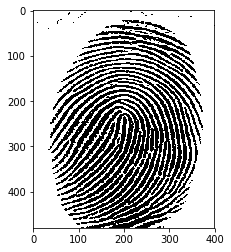

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

### Convert the image to data for black(0) and white(255) and make it numpy array

In [20]:
im=img.convert('L')
import numpy as np
imdata=np.asarray(im)
print('Image size is ')
print(imdata.shape)

Image size is 
(480, 400)


### Check the array by reconverting to image.

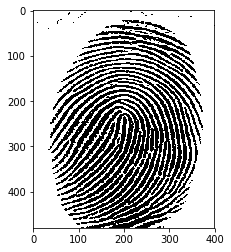

In [58]:
plt.imshow(Image.fromarray(imdata).convert('1'))
plt.imsave('img_full.png',Image.fromarray(imdata).convert('1'))

### Perform SVD analysis on the Fingerprint array.
#### Question: How many PCs do you expect?

In [22]:
u,s,v=np.linalg.svd(imdata)

In [24]:
print(np.shape(u))
print(np.shape(s))
print(np.shape(v))

(480, 480)
(400,)
(400, 400)


#### Question: How many PCs are good for approximation the original data?
### Plot the percentage of variance explained by each PC.


In [26]:
S=np.diag(s)        # s is 1d, this is how numpy reports s, np.diag makes it a size(s)*size(s) matrix with s as diagnol
var_or_eig=S.T.dot(S)  # this is nothing but eigen values of covariance matrix
var1d=np.diag(var_or_eig)     # to make it 1d from diagnol matrix, all other elements are zeors
var1dpct=var1d*100.0/sum(var1d)  #compute variance as percent

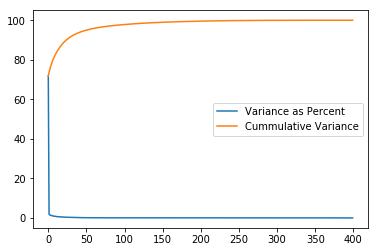

In [27]:
plt.plot(var1dpct,label="Variance as Percent")
plt.plot(var1dpct.cumsum(),label="Cummulative Variance")
plt.legend()

#### Looks like first few PCs contain most variance of the data.

## Reconstruct data from PCs
### 1. Using 2 PCs to reconstruct the data

In [28]:
img_data_2PC=u[:,0:2].dot(S[0:2,0:2]).dot(v[0:2,:])

The percent of variance from the original image
73.63662794146275


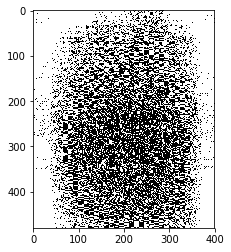

In [37]:
plt.imshow(Image.fromarray(img_data_2PC).convert('1'))
print('The percent of variance from the original image')
print(np.sum(var1dpct[0:2]))

### 2. Using 10 PCs to reconstruct the data.

In [55]:
img_data_10PC=u[:,0:10].dot(S[0:10,0:10]).dot(v[0:10,:])

192000


The percent of variance from the original image
82.4304580983708


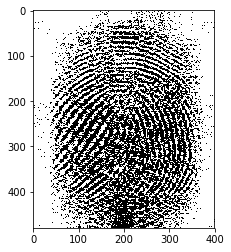

In [60]:
plt.imshow(Image.fromarray(img_data_10PC).convert('1'))
print('The percent of variance from the original image')
print(np.sum(var1dpct[0:10]))
plt.imsave('img_reduced.png',Image.fromarray(img_data_10PC).convert('1'))

The percent of variance from the original image
90.13294711894079


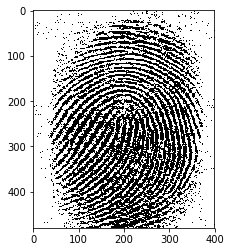

In [130]:
img_data_20PC=u[:,0:25].dot(S[0:25,0:25]).dot(v[0:25,:])
plt.imshow(Image.fromarray(img_data_20PC).convert('1'))
print('The percent of variance from the original image')
print(np.sum(var1dpct[0:25]))
plt.imsave('img_reduced.png',Image.fromarray(img_data_20PC).convert('1'))

## Now Try filtering the image with fft

Text(0.5,1,'Fourier transform')

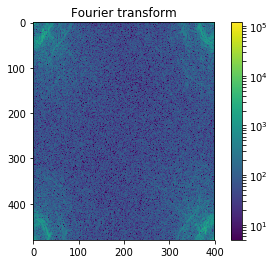

In [93]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5,1,'Filtered Spectrum')

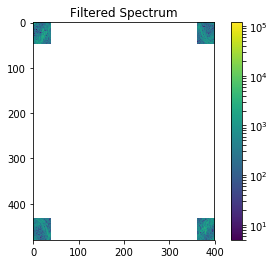

In [94]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5,1,'Reconstructed Image')

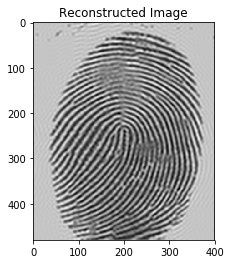

In [95]:
# Reconstruct the image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5,1,'Filtered Spectrum')

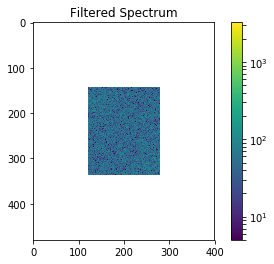

In [112]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.3

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft3 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between 0 :r*keep_fraction and
# r*(1-keep_fraction):end 
im_fft3[0:int(r*keep_fraction)] = 0
im_fft3[int(r*(1-keep_fraction)):-1] = 0

# Similarly with the columns:
im_fft3[:, 0:int(c*keep_fraction)] = 0
im_fft3[:, int(c*(1-keep_fraction)):-1] = 0

plt.figure()
plot_spectrum(im_fft3)
plt.title('Filtered Spectrum')

Text(0.5,1,'Reconstructed Image')

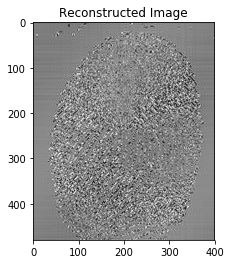

In [113]:
# Reconstruct the image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft3).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5,1,'Filtered Spectrum')

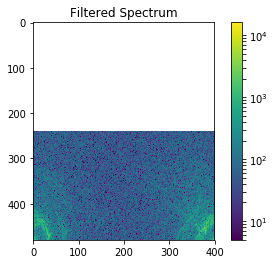

In [119]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.5

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft4 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft4.shape

# Set to zero all rows with indices between 0 :r*keep_fraction and
# r*(1-keep_fraction):end 
im_fft4[0:int(r*keep_fraction)] = 0

# Similarly with the columns:
#im_fft4[:, 0:int(c*keep_fraction)] = 0

plt.figure()
plot_spectrum(im_fft4)
plt.title('Filtered Spectrum')

Text(0.5,1,'Reconstructed Image')

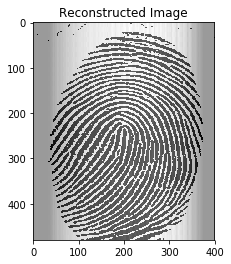

In [120]:
# Reconstruct the image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft4).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5,1,'Filtered Spectrum')

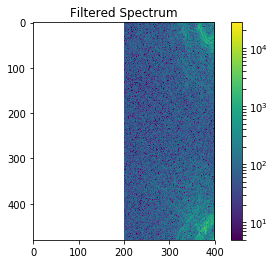

In [125]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.5

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft5 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft5.shape

# Set to zero all columns with indices between 0 :r*keep_fraction and
im_fft5[:, 0:int(c*keep_fraction)] = 0

plt.figure()
plot_spectrum(im_fft5)
plt.title('Filtered Spectrum')

Text(0.5,1,'Reconstructed Image')

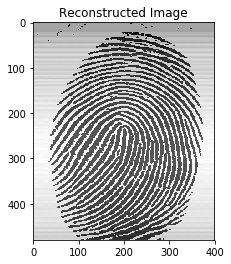

In [126]:
# Reconstruct the image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft5).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

## Merits of SVD vs fft image truncation

When the image is truncated with SVD, it takes a high percent of the original variance for the fingerprint to be recongizable as a fingerprint. Saving only two PCs saves 73.6% of the variance, but the resulting image does not have the structure of a fingerprint. If you retain 82.4% of the varaince (10 PCs), then the structure of the fingerprint starts to show. Saving 20 PCs or 92% of the variance then the fingerprint is even more clear. For an intricate image like the fingerprint, you may need to save a high percentage of the variance of the original image to retain a tolerable image. 

When the image is truncated with fft, you have more control over which aspect of the image you save. If you specifically keep the corners of the spectrum then you retain the structure of the fingerprint, but it is blurry. Keeping half of the spectrum, like in the last two images, you retain the sharp structure of the fingureprint.

The more you compress your image, the less recognizable the image will be. You have to decide what aspects of the image you want to keep.